<a href="https://colab.research.google.com/github/patrickjwolf/DS-Unit-2-Applied-Modeling/blob/master/module2/NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys
import pandas as pd
import pandas_profiling
!pip install category_encoders==2.*
!pip install -U pandas-profiling
!pip install eli5

In [78]:
url = 'https://github.com/patrickjwolf/DS_Unit_2/blob/master/nfl_statistics.csv?raw=true'

df = pd.read_csv(url)
df.shape

(1583, 251)

In [79]:
df.describe()

,Unnamed: 0,Unnamed:_0,Year,Superbowl_Winner,Superbowl_Loser,Wins,Losses,Ties,Offense_touchdowns_Rk,Offense_touchdowns_Total,Offense_touchdowns_Rsh,Offense_touchdowns_Rec,Offense_touchdowns_Def,Offense_scoring_Rk,Offense_scoring_INT,Offense_scoring_FUM,Offense_scoring_Blk_FG,Offense_scoring_Blk_Pnt,Offense_scoring_SFTY,Offense_scoring_2-PT,Offense_rushing_Rk,Offense_rushing_Att,Offense_rushing_Att/G,Offense_rushing_Yds,Offense_rushing_Avg,Offense_rushing_Yds/G,Offense_rushing_Lng,Offense_rushing_Lng_T,Offense_rushing_1st,Offense_rushing_1st%,Offense_rushing_20+,Offense_rushing_40+,Offense_rushing_FUM,Offense_receiving_Rk,Offense_receiving_Yds,Offense_receiving_FUM,Offense_punting_Rk,Offense_punting_Punts,Offense_punting_Yds,Offense_punting_Net_Yds,...,Defense_passing_Att,Defense_passing_Pct,Defense_passing_Att/G,Defense_passing_Yds,Defense_passing_Avg,Defense_passing_Yds/G,Defense_passing_Int,Defense_passing_1st,Defense_passing_1st%,Defense_passing_Lng,Defense_passing_Lng_T,Defense_passing_20+,Defense_passing_40+,Defense_passing_Sck,Defense_passing_Rate,Defense_interceptions_Rk,Defense_interceptions_PDef,Defense_interceptions_Int,Defense_interceptions_TDs,Defense_interceptions_Yds,Defense_interceptions_Lng,Defense_interceptions_Lng_T,Defense_game_stats_Rk,Defense_game_stats_G,Defense_game_stats_Pts/G,Defense_game_stats_TotPts,Defense_game_stats_Scrm_Plys,Defense_game_stats_Yds/G,Defense_game_stats_Yds/P,Defense_game_stats_1st/G,Defense_game_stats_3rd_Md,Defense_game_stats_3rd_Att,Defense_game_stats_3rd_Pct,Defense_game_stats_4th_Md,Defense_game_stats_4th_Att,Defense_game_stats_4th_Pct,Defense_game_stats_Pen,Defense_game_stats_Pen_Yds,Defense_game_stats_FUM,Defense_game_stats_Lost
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,...,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.00000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.00000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,791.000000,791.000000,1993.626027,-315.819330,-315.785850,-308.260265,-308.260265,-315.742893,-301.167404,-279.173089,-302.722678,-295.536323,-313.327858,-300.746052,-314.418825,-314.973468,-315.806696,-315.695515,-315.327858,-43081.721415,-300.699937,134.094125,-286.442325,1505.441567,-311.828869,-196.873973,-14863.085913,0.665193,-43027.593178,-43069.743588,-43076.756159,-43081.260897,-43077.850916,-300.787113,3033.720152,-43080.171194,-300.694883,-241.418825,2822.560960,-41482.835755,...,-6237.935565,-6642.309160,-6666.477574,-3524.966519,-6689.624068,-6491.182817,-6679.909033,-6595.442198,-6676.982628,-14848.542641,0.399874,-6670.434618,-6691.450411,-6661.828806,-6623.53645,-301.478206,-256.583702,-298.276058,-314.418825,-72.727732,-14861.378395,0.590651,-6681.765003,-6681.677827,-6676.611497,-6395.259002,-5781.09981,-6395.593936,-6691.352243,-6678.711371,-43036.193304,-42962.309539,-6674.208465,-43078.175616,-43073.741630,-6668.534428,-6605.192672,-5934.908402,-43068.955148,-43076.150979
std,457.117053,457.117053,15.554614,5612.942687,5612.944581,5613.369165,5613.369162,5612.947000,5613.774216,5615.014482,5613.682430,5614.089336,5613.083248,5613.797994,5613.021699,5612.990391,5612.943400,5612.949671,5612.970406,49534.882429,5613.800585,5638.731857,5614.598661,5727.949252,5613.167395,5619.6909

In [80]:
df

,Unnamed: 0,Unnamed:_0,Team,Year,Superbowl_Winner,Superbowl_Loser_Team,Superbowl_Loser,Wins,Losses,Ties,Offense_touchdowns_Rk,Offense_touchdowns_Total,Offense_touchdowns_Rsh,Offense_touchdowns_Rec,Offense_touchdowns_Def,Offense_scoring_Rk,Offense_scoring_INT,Offense_scoring_FUM,Offense_scoring_Blk_FG,Offense_scoring_Blk_Pnt,Offense_scoring_SFTY,Offense_scoring_2-PT,Offense_rushing_Rk,Offense_rushing_Att,Offense_rushing_Att/G,Offense_rushing_Yds,Offense_rushing_Avg,Offense_rushing_Yds/G,Offense_rushing_Lng,Offense_rushing_Lng_T,Offense_rushing_1st,Offense_rushing_1st%,Offense_rushing_20+,Offense_rushing_40+,Offense_rushing_FUM,Offense_receiving_Rk,Offense_receiving_Yds,Offense_receiving_FUM,Offense_punting_Rk,Offense_punting_Punts,...,Defense_passing_Pct,Defense_passing_Att/G,Defense_passing_Yds,Defense_passing_Avg,Defense_passing_Yds/G,Defense_passing_Int,Defense_passing_1st,Defense_passing_1st%,Defense_passing_Lng,Defense_passing_Lng_T,Defense_passing_20+,Defense_passing_40+,Defense_passing_Sck,Defense_passing_Rate,Defense_interceptions_Rk,Defense_interceptions_PDef,Defense_interceptions_Int,Defense_interceptions_TDs,Defense_interceptions_Yds,Defense_interceptions_Lng,Defense_interceptions_Lng_T,Defense_game_stats_Rk,Defense_game_stats_G,Defense_game_stats_Pts/G,Defense_game_stats_TotPts,Defense_game_stats_Scrm_Plys,Defense_game_stats_Yds/G,Defense_game_stats_Yds/P,Defense_game_stats_1st/G,Defense_game_stats_3rd_Md,Defense_game_stats_3rd_Att,Defense_game_stats_3rd_Pct,Defense_game_stats_4th_Md,Defense_game_stats_4th_Att,Defense_game_stats_4th_Pct,Defense_game_stats_Pen,Defense_game_stats_Pen_Yds,Defense_game_stats_ToP/G,Defense_game_stats_FUM,Defense_game_stats_Lost
0,0,0,Dallas Cowboys,1966,0,0,0,10,3,1,1,56,24,27,4,2,3,1,0,0,1,-99999,3,471,33.6,2122,4.5,151.6,-99999,1,-99999,-99999.0,-99999,-99999,-99999,10,3331,-99999,18,65,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,20,17,17,3,303,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
1,1,1581,NFL West All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.0,-99999,-99999.0,-99999.0,-99999,1,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
2,2,1578,AFL East All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.0,-99999,-99999.0,-99999.0,-99999,1,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
3,3,1579,AFL West All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.0,-99999,-99999.0,-99999.0,-99999,1,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
4,4,1580,NFL East All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-9

In [0]:
del df['Unnamed: 0']
del df['Unnamed:_0']

In [82]:
indexNames = df[ df['Year'] == 1966 ].index
indexNames = df[ df['Superbowl_Winner'] == -99999 ].index
df.drop(indexNames , inplace=True)

df

,Team,Year,Superbowl_Winner,Superbowl_Loser_Team,Superbowl_Loser,Wins,Losses,Ties,Offense_touchdowns_Rk,Offense_touchdowns_Total,Offense_touchdowns_Rsh,Offense_touchdowns_Rec,Offense_touchdowns_Def,Offense_scoring_Rk,Offense_scoring_INT,Offense_scoring_FUM,Offense_scoring_Blk_FG,Offense_scoring_Blk_Pnt,Offense_scoring_SFTY,Offense_scoring_2-PT,Offense_rushing_Rk,Offense_rushing_Att,Offense_rushing_Att/G,Offense_rushing_Yds,Offense_rushing_Avg,Offense_rushing_Yds/G,Offense_rushing_Lng,Offense_rushing_Lng_T,Offense_rushing_1st,Offense_rushing_1st%,Offense_rushing_20+,Offense_rushing_40+,Offense_rushing_FUM,Offense_receiving_Rk,Offense_receiving_Yds,Offense_receiving_FUM,Offense_punting_Rk,Offense_punting_Punts,Offense_punting_Yds,Offense_punting_Net_Yds,...,Defense_passing_Pct,Defense_passing_Att/G,Defense_passing_Yds,Defense_passing_Avg,Defense_passing_Yds/G,Defense_passing_Int,Defense_passing_1st,Defense_passing_1st%,Defense_passing_Lng,Defense_passing_Lng_T,Defense_passing_20+,Defense_passing_40+,Defense_passing_Sck,Defense_passing_Rate,Defense_interceptions_Rk,Defense_interceptions_PDef,Defense_interceptions_Int,Defense_interceptions_TDs,Defense_interceptions_Yds,Defense_interceptions_Lng,Defense_interceptions_Lng_T,Defense_game_stats_Rk,Defense_game_stats_G,Defense_game_stats_Pts/G,Defense_game_stats_TotPts,Defense_game_stats_Scrm_Plys,Defense_game_stats_Yds/G,Defense_game_stats_Yds/P,Defense_game_stats_1st/G,Defense_game_stats_3rd_Md,Defense_game_stats_3rd_Att,Defense_game_stats_3rd_Pct,Defense_game_stats_4th_Md,Defense_game_stats_4th_Att,Defense_game_stats_4th_Pct,Defense_game_stats_Pen,Defense_game_stats_Pen_Yds,Defense_game_stats_ToP/G,Defense_game_stats_FUM,Defense_game_stats_Lost
0,Dallas Cowboys,1966,0,0,0,10,3,1,1,56,24,27,4,2,3,1,0,0,1,-99999,3,471,33.6,2122,4.5,151.6,-99999,1,-99999,-99999.0,-99999,-99999,-99999,10,3331,-99999,18,65,2551,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,20,17,17,3,303,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
5,Denver Broncos,1966,0,0,0,4,10,0,24,22,6,12,1,24,0,0,1,0,0,-99999,23,376,26.9,1173,3.1,83.8,-99999,1,-99999,-99999.0,-99999,-99999,-99999,23,2351,-99999,1,77,3480,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,24,13,13,0,109,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
6,Detroit Lions,1966,0,0,0,4,9,1,23,23,13,8,1,22,1,0,0,0,0,-99999,19,394,28.1,1429,3.6,102.1,-99999,1,-99999,-99999.0,-99999,-99999,-99999,5,2752,-99999,8,72,2956,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,8,24,24,1,366,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
7,Miami Dolphins,1966,0,0,0,3,11,0,20,26,5,16,4,21,4,0,0,0,0,-99999,21,394,28.1,1410,3.6,100.7,-99999,1,-99999,-99999.0,-99999,-99999,-99999,20,2374,-99999,4,82,3227,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,2,31,31,4,522,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
8,Chicago Bears,1966,0,0,0,5,7,2,20,26,12,10,2,20,0,2,0,0,0,-99999,6,463,33.1,1927,4.2,137.6,-99999,1,-99999,-99999.0,-99999,-99999,-99999,24,2016,-99999,2,80,3358,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,22,15,15,0,155,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
...,...,...,...,...,...,...,...,...,...,...,..

In [83]:
df_rank = df.filter(items=['Team',	'Year', 'Superbowl_Winner', 'Superbowl_Loser_Team', 'Superbowl_Loser', 'Offense_touchdowns_Rk', 'Offense_scoring_Rk', 'Offense_rushing_Rk',
 'Offense_receiving_Rk', 'Offense_punting_Rk', 'Offense_passing_Rk',
 'Offense_offensive_line_Rk', 'Offense_kick_returns_Rk', 'Offense_kicking_Rk',
 'Offense_game_stats_Rk', 'Offense_field_goals_Rk', 'Defense_touchdowns_Rk',
 'Defense_tackles_Rk', 'Defense_scoring_Rk', 'Defense_rushing_Rk', 'Defense_receiving_Rk',
 'Defense_passing_Rk', 'Defense_interceptions_Rk', 'Defense_game_stats_Rk'])

df_rank

,Team,Year,Superbowl_Winner,Superbowl_Loser_Team,Superbowl_Loser,Offense_touchdowns_Rk,Offense_scoring_Rk,Offense_rushing_Rk,Offense_receiving_Rk,Offense_punting_Rk,Offense_passing_Rk,Offense_offensive_line_Rk,Offense_kick_returns_Rk,Offense_kicking_Rk,Offense_game_stats_Rk,Offense_field_goals_Rk,Defense_touchdowns_Rk,Defense_tackles_Rk,Defense_scoring_Rk,Defense_rushing_Rk,Defense_receiving_Rk,Defense_passing_Rk,Defense_interceptions_Rk,Defense_game_stats_Rk
0,Dallas Cowboys,1966,0,0,0,1,2,3,10,18,4,-99999,9,-99999,1,12,-99999,-99999,-99999,-99999,-99999,-99999,20,-99999
5,Denver Broncos,1966,0,0,0,24,24,23,23,1,21,-99999,2,-99999,24,19,-99999,-99999,-99999,-99999,-99999,-99999,24,-99999
6,Detroit Lions,1966,0,0,0,23,22,19,5,8,18,-99999,10,-99999,17,18,-99999,-99999,-99999,-99999,-99999,-99999,8,-99999
7,Miami Dolphins,1966,0,0,0,20,21,21,20,4,19,-99999,8,-99999,22,22,-99999,-99999,-99999,-99999,-99999,-99999,2,-99999
8,Chicago Bears,1966,0,0,0,20,20,6,24,2,24,-99999,1,-99999,19,8,-99999,-99999,-99999,-99999,-99999,-99999,22,-99999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,Los Angeles Rams,2019,0,0,0,15,14,20,13,19,9,4,11,5,13,8,22,6,24,28,13,20,20,23
1579,New York Giants,2019,0,0,0,16,22,23,9,21,16,26,8,24,24,30,4,7,4,10,25,11,11,6
1580,Tennessee Titans,2019,0,0,0,16,22,15,31,3,22,32,20,25,26,31,22,11,25,20,11,13,7,15
1581,Buffalo Bills,2019,0,0,0,18,21,8,28,15,24,13,1,18,19,27,26,19,30,16,22,30,22,30


In [84]:
df_rank.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 0 to 1582
Data columns (total 24 columns):
Team                         1578 non-null object
Year                         1578 non-null int64
Superbowl_Winner             1578 non-null int64
Superbowl_Loser_Team         1578 non-null object
Superbowl_Loser              1578 non-null int64
Offense_touchdowns_Rk        1578 non-null int64
Offense_scoring_Rk           1578 non-null int64
Offense_rushing_Rk           1578 non-null int64
Offense_receiving_Rk         1578 non-null int64
Offense_punting_Rk           1578 non-null int64
Offense_passing_Rk           1578 non-null int64
Offense_offensive_line_Rk    1578 non-null int64
Offense_kick_returns_Rk      1578 non-null int64
Offense_kicking_Rk           1578 non-null int64
Offense_game_stats_Rk        1578 non-null int64
Offense_field_goals_Rk       1578 non-null int64
Defense_touchdowns_Rk        1578 non-null int64
Defense_tackles_Rk           1578 non-null int64
Defense_s

In [85]:
df_rank.isnull().sum()

Team                         0
Year                         0
Superbowl_Winner             0
Superbowl_Loser_Team         0
Superbowl_Loser              0
Offense_touchdowns_Rk        0
Offense_scoring_Rk           0
Offense_rushing_Rk           0
Offense_receiving_Rk         0
Offense_punting_Rk           0
Offense_passing_Rk           0
Offense_offensive_line_Rk    0
Offense_kick_returns_Rk      0
Offense_kicking_Rk           0
Offense_game_stats_Rk        0
Offense_field_goals_Rk       0
Defense_touchdowns_Rk        0
Defense_tackles_Rk           0
Defense_scoring_Rk           0
Defense_rushing_Rk           0
Defense_receiving_Rk         0
Defense_passing_Rk           0
Defense_interceptions_Rk     0
Defense_game_stats_Rk        0
dtype: int64

In [86]:
df_rank['Superbowl_Winner'].describe()

count    1578.000000
mean        0.033587
std         0.180220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Superbowl_Winner, dtype: float64

In [0]:
y = df_rank['Superbowl_Winner']

In [88]:
y.nunique()

2

In [89]:
y.value_counts(normalize=True).max()

0.9664131812420785

In [91]:
df_rank['Superbowl_Winner'].value_counts()

0    1525
1      53
Name: Superbowl_Winner, dtype: int64

In [0]:
train = df_rank[df_rank['Year'] <= 2014]
val = df_rank[(df_rank['Year'] > 2014) & (df['Year'] < 2019)]
test = df_rank[df_rank['Year'] == 2019]

In [93]:
train.shape, val.shape, test.shape

((1418, 24), (128, 24), (32, 24))

In [94]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'Superbowl_Winner'
features = df_rank.columns.drop([target, 'Year'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 1.0


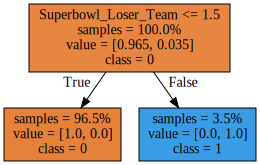

In [95]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [0]:
# Drop feature with "leakage"
drop1 = df_rank.drop(columns=['Superbowl_Loser_Team'])

In [100]:
target = 'Superbowl_Winner'
features = df_rank.columns.drop([target, 'Year'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 1.0


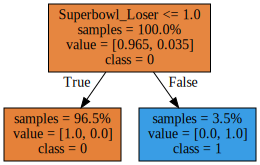

In [101]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [0]:
# Drop feature with "leakage"
drop2 = df_rank.drop(columns=['Superbowl_Loser'])

In [109]:
target = 'Superbowl_Winner'
features = df_rank.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 1.0


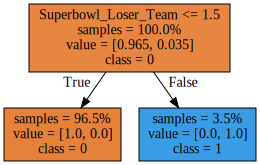

In [110]:
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [0]:
profile_report = train.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report

AttributeError: ignored